# Check Extinction Law

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('../')

In [2]:

import hmac
import matplotlib.pyplot as plt
from src.HMC_Single_Star_cosdist import HMC_Sampler
from src import NF_Cos_dist
import jax.numpy as jnp
import numpy as np
import matplotlib.colors as mcolors
import jax.numpy as jnp
import jax.random as jr
nf=NF_Cos_dist.JaxNormFlow()

hmc=HMC_Sampler()

/opt/homebrew/Caskroom/miniforge/base/envs/flowjax/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': 
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/flowjax/bin/../lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file), '/usr/local/lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache)


1226200
1226200


### Create samples of the data and get the real data

In [3]:
j=nf
samples=j.flow.sample(jr.PRNGKey(0),sample_shape=(800,))
samples=samples+j.mean#*j.std


In [4]:
real=(j.data+j.mean)[:len(j.data)//32]#*j.std+j.mean

In [5]:
real=samples

#### No extinction calculation

In [6]:
phots=[]
logps=[]
a0s=[]
for a0 in [0.0]:
    ext_phot=hmc.extincted_phot(real[:],a0*jnp.ones_like(real[:,0]))[0]-j.mean
    log_p_ext=j.flow.log_prob(ext_phot)
    ext_phot+=j.mean

    phots.append(ext_phot)
    logps.append(log_p_ext)
    a0s.append(a0*jnp.ones_like(real[:,0]))
pho=np.concatenate(phots,0)
lp=np.concatenate(logps,0)
a0s=np.concatenate(a0s,0)

### Extinction calculation

In [7]:
phots=[]
logps=[]
a0s=[]
for a0 in np.arange(0.1,1.5,0.1):
    ext_phot=hmc.extincted_phot(real[:],a0*jnp.ones_like(real[:,0]))[0]-j.mean
    log_p_ext=j.flow.log_prob(ext_phot)
    ext_phot+=j.mean

    phots.append(ext_phot)
    logps.append(log_p_ext)
    a0s.append(a0*jnp.ones_like(real[:,0]))
pho_1=np.stack(phots,1)
lp_1=np.stack(logps,1)
a0s_1=np.stack(a0s,1)

### Check the extinction curve

In [8]:
ext_coefficients=(pho_1-pho[:,None,:])/a0s_1[:,:,None]

In [9]:
print(ext_coefficients.shape)

(800, 14, 12)


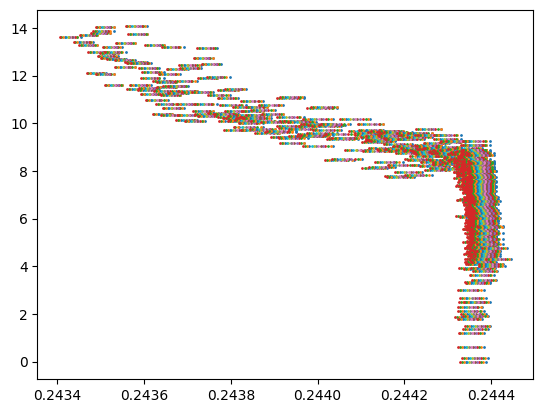

In [14]:

plt.figure()
for i in range(ext_coefficients.shape[1]):
    plt.scatter(ext_coefficients[:,i,1]+ext_coefficients[:,i,1],pho[:,1]+pho[:,1],s=1)

plt.show()

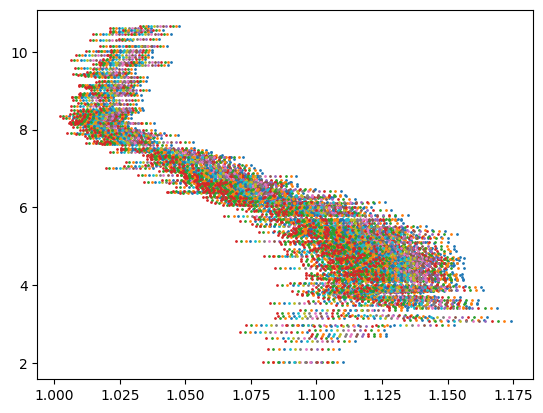

In [11]:

plt.figure()
for i in range(ext_coefficients.shape[1]):
    plt.scatter(ext_coefficients[:,i,-9]+ext_coefficients[:,i,1],pho[:,1]+pho[:,2],s=1)

plt.show()